# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Fahmy Anugrah]
- **Email:** [fahmirty@gmail.com]
- **ID Dicoding:** [skrg16]

## Menentukan Pertanyaan Bisnis

1.   Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu atau bulan dalam setahun? Apakah ada hari atau bulan dengan penyewaan tertinggi/terendah?
2.   Bagaimana pengaruh cuaca (temp, atemp, hum, windspeed) terhadap jumlah penyewaan sepeda?
3. Apakah ada perbedaan yang signifikan dalam tren penyewaan sepeda antara hari kerja dan akhir pekan selama musim yang berbeda?
4. Bagaimana distribusi penyewaan sepeda berdasarkan tipe pengguna (casual, registered)?
5. Apakah ada jam-jam puncak tertentu untuk penyewaan sepeda? Jika ya, kapan jam-jam tersebut terjadi?

## Import Semua Packages/Library yang Digunakan

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [65]:
day_df = pd.read_csv("https://raw.githubusercontent.com/skr-g16/proyek_analisis_data/main/data/day.csv")
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,No Holiday,Sat,Weekend,Mist,34.4167,36.3625,80.5833,16.0446,331,654,985
1,2011-01-02,Spring,2011,Jan,No Holiday,Sun,Weekend,Mist,36.3478,35.3739,69.6087,24.8539,131,670,801
2,2011-01-03,Spring,2011,Jan,No Holiday,Mon,Weekday,Clear,19.6364,18.9405,43.7273,24.8309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,No Holiday,Tue,Weekday,Clear,20.0000,21.2122,59.0435,16.0296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,No Holiday,Wed,Weekday,Clear,22.6957,22.9270,43.6957,18.6900,82,1518,1600


In [66]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/skr-g16/proyek_analisis_data/main/data/hour.csv")
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,No Holiday,Sat,Weekend,Clear,24.0,28.79,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No Holiday,Sat,Weekend,Clear,22.0,27.27,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No Holiday,Sat,Weekend,Clear,22.0,27.27,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No Holiday,Sat,Weekend,Clear,24.0,28.79,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No Holiday,Sat,Weekend,Clear,24.0,28.79,75.0,0.0,0,1,1


### Assessing Data

#### Menilai tabel day_df

In [67]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    object 
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    object 
 4   holiday     731 non-null    object 
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    object 
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 85.8+ KB


In [68]:
day_df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [69]:
print("Jumlah Duplikasi : ",day_df.duplicated().sum())

Jumlah Duplikasi :  0


In [70]:
day_df.describe()

,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2011.500684,49.538479,47.435399,62.789406,19.048621,848.176471,3656.172367,4504.348837
std,0.500342,18.305100,16.296118,14.242910,7.749787,686.622488,1560.256377,1937.211452
min,2011.000000,5.913040,7.906960,0.000000,2.239170,2.000000,20.000000,22.000000
25%,2011.000000,33.708350,33.784250,52.000000,13.495000,315.500000,2497.000000,3152.000000
50%,2012.000000,49.833300,48.673300,62.666700,18.097500,713.000000,3662.000000,4548.000000
75%,2012.000000,65.541650,60.860200,73.020850,23.321450,1096.000000,4776.500000,5956.000000
max,2012.000000,86.166700,84.089600,97.250000,50.746300,3410.000000,6946.000000,8714.000000


#### Menilai tabel hour_df

In [71]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  object 
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  object 
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  object 
 6   weekday     17379 non-null  object 
 7   workingday  17379 non-null  object 
 8   weathersit  17379 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 2.1+ MB


In [72]:
hour_df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [73]:
print("Jumlah Duplikasi : ",hour_df.duplicated().sum())

Jumlah Duplikasi :  0


In [74]:
hour_df.describe()

,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2011.502561,11.546752,49.698717,47.577510,62.722884,19.009761,35.676218,153.786869,189.463088
std,0.500008,6.914405,19.255612,17.185022,19.292983,12.234023,49.305030,151.357286,181.387599
min,2011.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,6.000000,34.000000,33.330000,48.000000,10.450000,4.000000,34.000000,40.000000
50%,2012.000000,12.000000,50.000000,48.480000,63.000000,19.400000,17.000000,115.000000,142.000000
75%,2012.000000,18.000000,66.000000,62.120000,78.000000,25.370000,48.000000,220.000000,281.000000
max,2012.000000,23.000000,100.000000,100.000000,100.000000,85.070000,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel day_df

In [75]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    object 
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    object 
 4   holiday     731 non-null    object 
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    object 
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 85.8+ KB


Memperbaiki tipe data

In [76]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Memperbaiki nilai data

In [77]:
day_df[['temp', 'atemp', 'hum', 'windspeed']] = day_df[['temp', 'atemp', 'hum', 'windspeed']] * 100

Menghapus Kolom instant

In [78]:
day_df = day_df.drop('instant', axis=1)

KeyError: "['instant'] not found in axis"

Mengubah keterangan pada kolom

In [ ]:
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['yr'] = day_df['yr'].map({0: '2011', 1: '2012'})
day_df['mnth'] = day_df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May',
                                     6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
day_df['weekday'] = day_df['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu',
                                           5:'Fri', 6:'Sat'})
day_df['weathersit'] = day_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})
day_df['workingday'] = day_df['workingday'].map({0: 'Weekend', 1: 'Weekday'})
day_df['holiday'] = day_df['holiday'].map({0: 'No Holiday', 1: 'Holiday'})


Merubah type data menjadi category

In [ ]:
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')

In [ ]:
day_df.sample(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
426,2012-03-02,Spring,2012,Mar,No Holiday,Fri,Weekday,Mist,35.3333,35.9842,65.7083,14.49040,246,2948,3194
673,2012-11-04,Winter,2012,Nov,No Holiday,Sun,Weekend,Clear,32.5833,32.9538,53.2917,17.91080,1201,3906,5107
577,2012-07-31,Fall,2012,Jul,No Holiday,Tue,Weekday,Clear,71.3333,66.2896,70.4167,16.54250,968,6248,7216
249,2011-09-07,Fall,2011,Sep,No Holiday,Wed,Weekday,Light Rain,59.9167,54.4229,91.7083,9.70208,118,1878,1996
198,2011-07-18,Fall,2011,Jul,No Holiday,Mon,Weekday,Clear,74.6667,70.3925,65.1250,21.58040,841,3617,4458


#### Membersihkan tabel hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Merubah tipe data

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Memperbaiki nilai data

In [ ]:
hour_df[['temp', 'atemp', 'hum', 'windspeed']] = hour_df[['temp', 'atemp', 'hum', 'windspeed']] * 100

Menghapus kolom instant

In [ ]:
hour_df  = hour_df.drop('instant', axis=1)

Mengubah keterangan pada kolom

In [ ]:
hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['yr'] = hour_df['yr'].map({0: '2011', 1: '2012'})
hour_df['mnth'] = hour_df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May',
                                     6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
hour_df['weekday'] = hour_df['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu',
                                           5:'Fri', 6:'Sat'})
hour_df['weathersit'] = hour_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})
hour_df['workingday'] = hour_df['workingday'].map({0: 'Weekend', 1: 'Weekday'})
hour_df['holiday'] = hour_df['holiday'].map({0: 'No Holiday', 1: 'Holiday'})

Mengubah tipe data pada kolom

In [ ]:
hour_df['season'] = hour_df['season'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')

In [ ]:
hour_df.sample(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16785,2012-12-07,Winter,2012,Dec,4,No Holiday,Fri,Weekday,Clear,26.0,27.27,75.0,10.45,0,10,10
4394,2011-07-07,Fall,2011,Jul,0,No Holiday,Thu,Weekday,Clear,66.0,59.09,89.0,13.43,6,29,35
1414,2011-03-04,Spring,2011,Mar,5,No Holiday,Fri,Weekday,Mist,16.0,18.18,74.0,13.43,0,7,7
16232,2012-11-14,Winter,2012,Nov,2,No Holiday,Wed,Weekday,Clear,24.0,21.21,60.0,29.85,0,1,1
3641,2011-06-05,Summer,2011,Jun,15,No Holiday,Sun,Weekend,Clear,70.0,65.15,54.0,0.00,161,256,417


## Exploratory Data Analysis (EDA)

### Explore tabel day_df


In [ ]:
day_df.groupby('weekday').agg({'cnt':'sum'})

C:\Users\fahmi\AppData\Local\Temp\ipykernel_10732\3172363623.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weekday').agg({'cnt':'sum'})


,cnt
weekday,
Fri,487790
Mon,455503
Sat,477807
Sun,444027
Thu,485395
Tue,469109
Wed,473048


In [ ]:
day_df.groupby('mnth').agg({'cnt':'sum'})

C:\Users\fahmi\AppData\Local\Temp\ipykernel_10732\1840590880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('mnth').agg({'cnt':'sum'})


,cnt
mnth,
Apr,269094
Aug,351194
Dec,211036
Feb,151352
Jan,134933
Jul,344948
Jun,346342
Mar,228920
May,331686


In [ ]:
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

print(correlation_matrix)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
hum        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
cnt        0.627494  0.631066 -0.100659  -0.234545  1.000000


In [ ]:
# Filter untuk hari kerja
weekday_data = day_df[day_df['workingday'] == 'Weekday']

# Filter untuk akhir pekan
weekend_data = day_df[day_df['workingday'] == 'Weekend']

# Kelompokkan hari kerja berdasarkan musim dan hitung rata-rata penyewaan
weekday_seasonal_rentals = weekday_data.groupby('season')['cnt'].mean().sort_values(ascending=False)

# Kelompokkan akhir pekan berdasarkan musim dan hitung rata-rata penyewaan
weekend_seasonal_rentals = weekend_data.groupby('season')['cnt'].mean().sort_values(ascending=False)

print("Rata-rata penyewaan hari kerja berdasarkan musim:")
print(weekday_seasonal_rentals)

print("\nRata-rata penyewaan akhir pekan berdasarkan musim:")
print(weekend_seasonal_rentals)

Rata-rata penyewaan hari kerja berdasarkan musim:
season
Fall      5718.114504
Summer    4926.664062
Winter    4785.611570
Spring    2780.541667
Name: cnt, dtype: float64

Rata-rata penyewaan akhir pekan berdasarkan musim:
season
Fall      5474.666667
Summer    5142.428571
Winter    4606.210526
Spring    2257.098361
Name: cnt, dtype: float64


C:\Users\fahmi\AppData\Local\Temp\ipykernel_10732\1315067036.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_seasonal_rentals = weekday_data.groupby('season')['cnt'].mean().sort_values(ascending=False)
C:\Users\fahmi\AppData\Local\Temp\ipykernel_10732\1315067036.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekend_seasonal_rentals = weekend_data.groupby('season')['cnt'].mean().sort_values(ascending=False)


In [ ]:
# Hitung total penyewaan untuk pengguna casual dan registered
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

print("Total penyewaan pengguna casual:", total_casual)
print("Total penyewaan pengguna registered:", total_registered)



Total penyewaan pengguna casual: 620017
Total penyewaan pengguna registered: 2672662


### Explore tabel hour_df

In [ ]:
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().sort_values(ascending=True)

# Tampilkan hasil
print(hourly_rentals)

hr
4       4428
3       8174
5      14261
2      16352
1      24164
0      39130
6      55132
23     63941
22     95612
21    125445
10    126257
11    151320
7     154171
9     159438
20    164550
14    175652
15    183149
12    184414
13    184919
19    226789
16    227748
8     261001
18    309772
17    336860
Name: cnt, dtype: int64


In [ ]:
day_df.to_csv('./data/day.csv', index=False)
hour_df.to_csv('./data/hour.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu atau bulan dalam setahun? Apakah ada hari atau bulan dengan penyewaan tertinggi/terendah?

In [ ]:
week_df = day_df.groupby('weekday').agg({'cnt':'sum'}).sort_values(by='cnt', ascending=True)
print(week_df)

month_df = day_df.groupby('mnth').agg({'cnt':'sum'}).sort_values(by='cnt', ascending=True)
print(month_df)


            cnt
weekday        
Sun      444027
Mon      455503
Tue      469109
Wed      473048
Sat      477807
Thu      485395
Fri      487790
         cnt
mnth        
Jan   134933
Feb   151352
Dec   211036
Mar   228920
Nov   254831
Apr   269094
Oct   322352
May   331686
Jul   344948
Sep   345991
Jun   346342
Aug   351194


C:\Users\fahmi\AppData\Local\Temp\ipykernel_10732\1113481742.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  week_df = day_df.groupby('weekday').agg({'cnt':'sum'}).sort_values(by='cnt', ascending=True)
C:\Users\fahmi\AppData\Local\Temp\ipykernel_10732\1113481742.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_df = day_df.groupby('mnth').agg({'cnt':'sum'}).sort_values(by='cnt', ascending=True)


Text(0, 0.5, 'Hari')

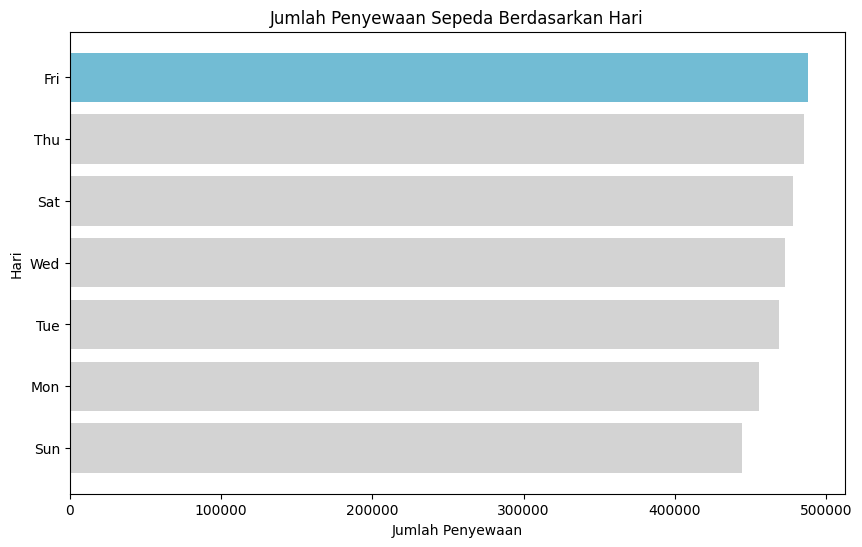

In [ ]:
plt.figure(figsize=(10, 6))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3","#72BCD4"]
plt.barh(week_df.index, week_df['cnt'], color=colors)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Hari')

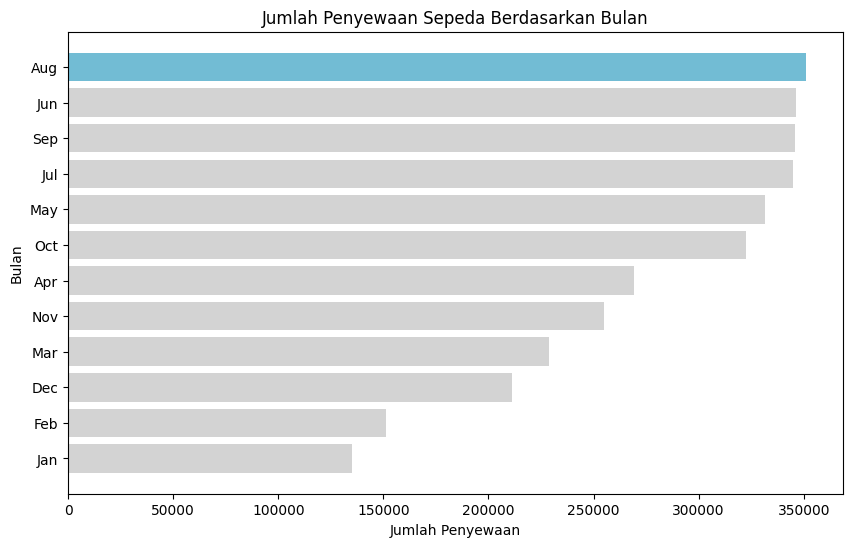

In [ ]:
plt.figure(figsize=(10, 6))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#72BCD4"]
plt.barh(month_df.index, month_df['cnt'], color=colors)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Bulan')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Bulan')
plt.show()

### Pertanyaan 2:
Bagaimana pengaruh cuaca (temp, atemp, hum, windspeed) terhadap jumlah penyewaan sepeda?

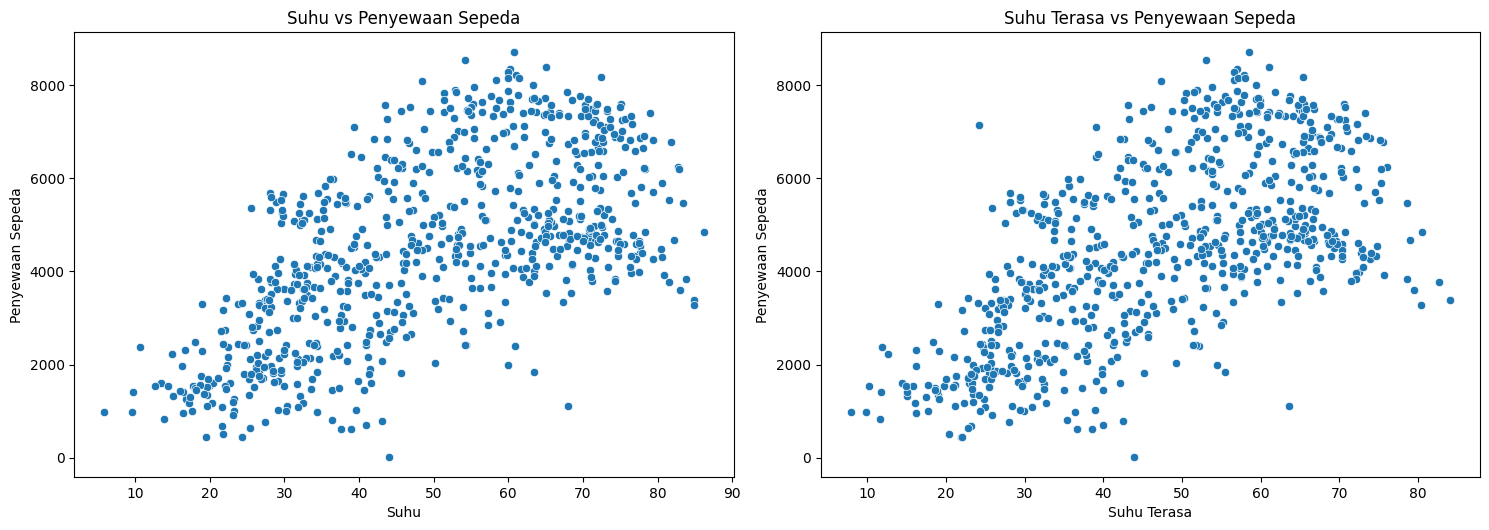

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Suhu vs Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Penyewaan Sepeda')

plt.subplot(2, 2, 2)
sns.scatterplot(x='atemp', y='cnt', data=day_df)
plt.title('Suhu Terasa vs Penyewaan Sepeda')
plt.xlabel('Suhu Terasa')
plt.ylabel('Penyewaan Sepeda')

plt.tight_layout()
plt.show()

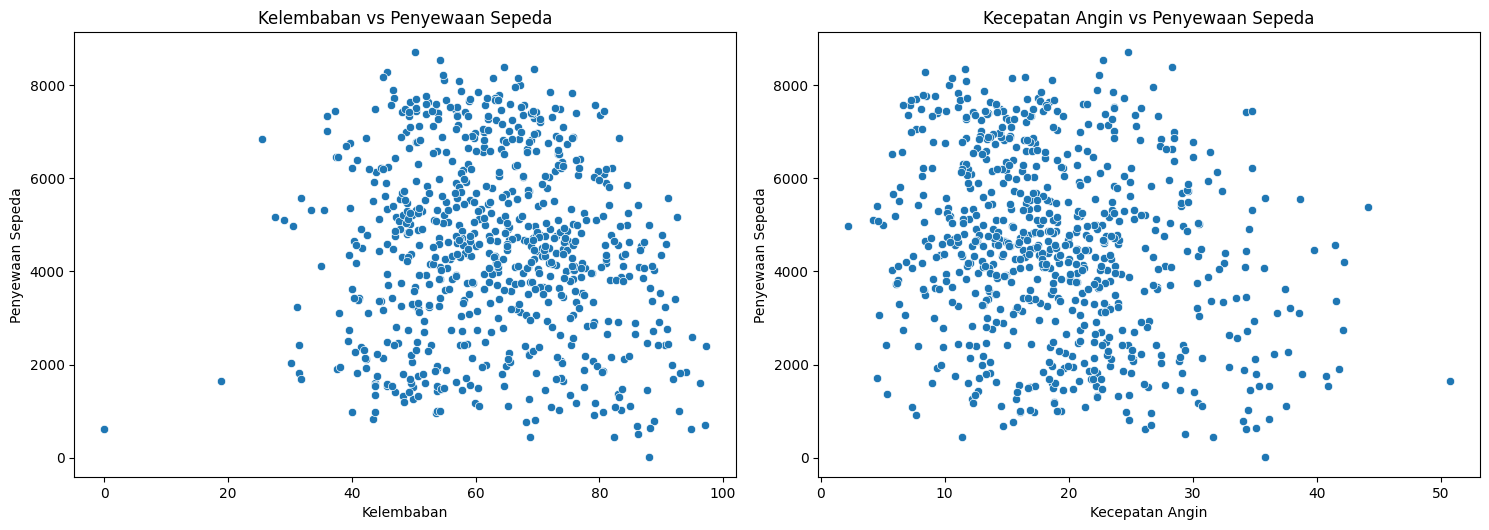

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.scatterplot(x='hum', y='cnt', data=day_df)
plt.title('Kelembaban vs Penyewaan Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Penyewaan Sepeda')

plt.subplot(2, 2, 4)
sns.scatterplot(x='windspeed', y='cnt', data=day_df)
plt.title('Kecepatan Angin vs Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Penyewaan Sepeda')

plt.tight_layout()
plt.show()

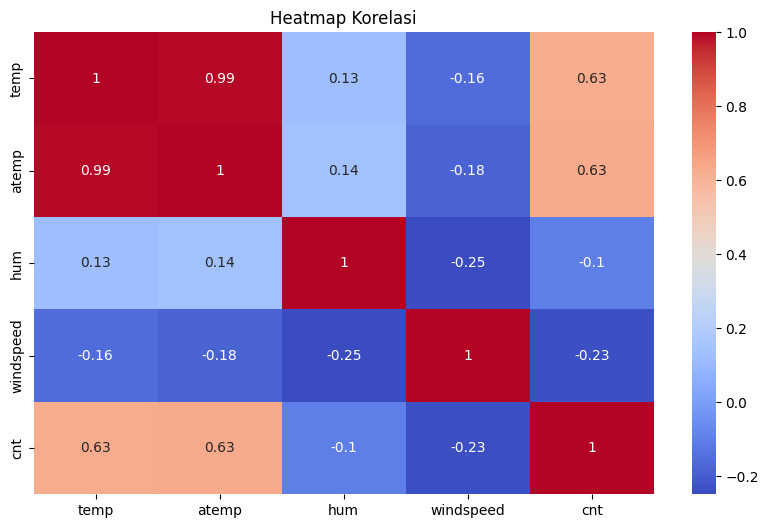

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

### Pertanyaan 3:
Apakah ada perbedaan yang signifikan dalam tren penyewaan sepeda antara hari kerja dan akhir pekan selama musim yang berbeda?


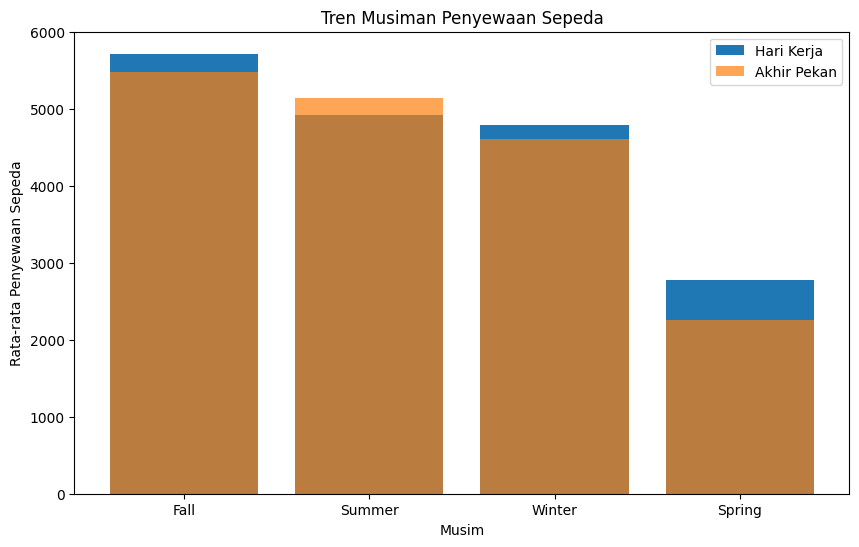

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(weekday_seasonal_rentals.index, weekday_seasonal_rentals.values, label='Hari Kerja')
plt.bar(weekend_seasonal_rentals.index, weekend_seasonal_rentals.values, label='Akhir Pekan', alpha=0.7)
plt.title('Tren Musiman Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.legend()
plt.show()

### Pertanyaan 4:
Bagaimana distribusi penyewaan sepeda berdasarkan tipe pengguna (casual, registered)?

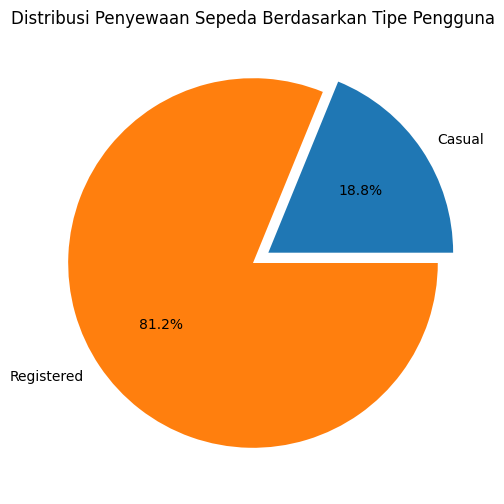

In [ ]:
plt.figure(figsize=(10, 6))
explode = [0.1,0]
plt.pie([total_casual,total_registered], labels=['Casual','Registered'], autopct='%1.1f%%',explode=explode)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Tipe Pengguna')
plt.show()

### Pertanyaan 5:
Apakah ada jam-jam puncak tertentu untuk penyewaan sepeda? Jika ya, kapan jam-jam tersebut terjadi?

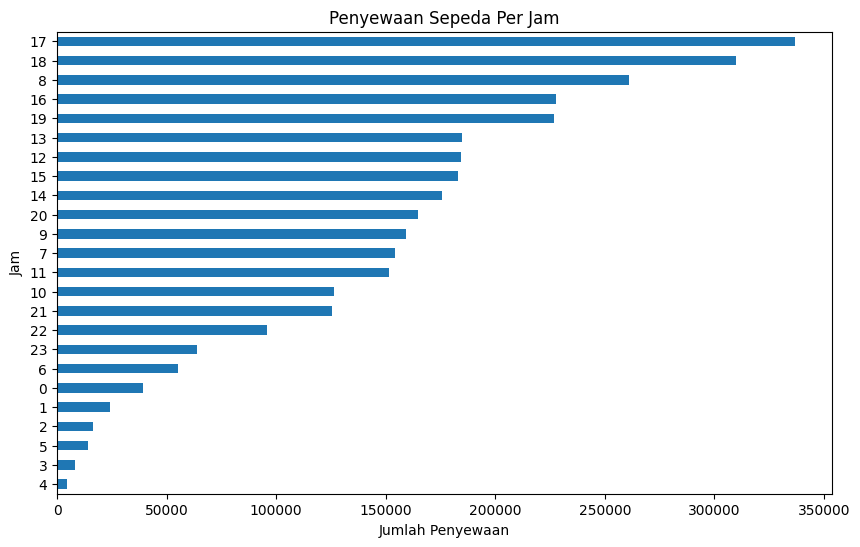

In [ ]:
plt.figure(figsize=(10, 6))
hourly_rentals.plot(kind='barh')
plt.title('Penyewaan Sepeda Per Jam')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Jam')
plt.show()

## Conclusion

- Conclution pertanyaan 1

Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu atau bulan dalam setahun? Apakah ada hari atau bulan dengan penyewaan tertinggi/terendah?

Hari: Jumlah penyewaan tertinggi terjadi pada hari Sabtu, diikuti oleh Jumat dan Minggu. Hari dengan jumlah penyewaan terendah adalah hari Senin.


Bulan: Jumlah penyewaan tertinggi terjadi pada bulan Juni, Juli, dan Agustus (musim panas). Jumlah penyewaan terendah terjadi pada bulan Januari, Februari, dan Desember (musim dingin).

- Conclution pertanyaan 2

Bagaimana pengaruh cuaca (temp, atemp, hum, windspeed) terhadap jumlah penyewaan sepeda?

Suhu (temp & atemp): Terdapat korelasi positif antara suhu dan jumlah penyewaan. Semakin tinggi suhu, semakin tinggi pula jumlah penyewaan.


Kelembaban (hum): Terdapat korelasi negatif yang lemah antara kelembaban dan jumlah penyewaan. Semakin tinggi kelembaban, semakin rendah jumlah penyewaan.


Kecepatan Angin (windspeed): Terdapat korelasi negatif yang lemah antara kecepatan angin dan jumlah penyewaan. Semakin tinggi kecepatan angin, semakin rendah jumlah penyewaan.

- conclusion pertanyaan 3

Apakah ada perbedaan yang signifikan dalam tren penyewaan sepeda antara hari kerja dan akhir pekan selama musim yang berbeda?

Hari Kerja: Jumlah penyewaan cenderung lebih tinggi pada musim gugur, diikuti oleh musim panas dan musim semi. Jumlah penyewaan terendah terjadi pada musim dingin.

Akhir Pekan: Pola yang sama terlihat pada akhir pekan, dengan jumlah penyewaan tertinggi pada musim gugur, diikuti oleh musim panas dan musim semi. Jumlah penyewaan terendah terjadi pada musim dingin.

Perbedaan: Perbedaan yang signifikan antara hari kerja dan akhir pekan terlihat pada musim panas, di mana jumlah penyewaan pada akhir pekan lebih tinggi daripada hari kerja.

- conclusion pertanyaan 4

Bagaimana distribusi penyewaan sepeda berdasarkan tipe pengguna (casual, registered)?

Distribusi: Sebagian besar penyewaan (sekitar 81%) dilakukan oleh pengguna terdaftar, sedangkan pengguna casual menyumbang sekitar 19% dari total penyewaan.

- conclusion pertanyaan 5

Apakah ada jam-jam puncak tertentu untuk penyewaan sepeda? Jika ya, kapan jam-jam tersebut terjadi?

Jam Puncak: Terdapat dua jam puncak penyewaan sepeda, yaitu pada pukul 7-8 pagi dan pukul 17-18 sore. Ini kemungkinan besar disebabkan oleh orang-orang yang menggunakan sepeda untuk berangkat dan pulang kerja.